# Тема “Обучение без учителя”


   

# Задание 1

In [49]:
# Импортируйте библиотеки pandas и numpy.
# Сразу загрузим все необходимые в работе модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

In [12]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
boston = load_boston()
boston.keys()
#boston.values()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [13]:
boston.data.shape

(506, 13)

In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
#Creating value with data
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [17]:
#Creating value with price
y = pd.DataFrame(boston.target, columns = ['price'])
y.head(3)

,price
0,24.0
1,21.6
2,34.7


In [18]:
X.shape, y.shape

((506, 13), (506, 1))

In [19]:
#Checking for NaN-values
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


(None, None)

In [20]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((404, 13), (102, 13), (404, 1), (102, 1))

In [88]:
y_train

,price
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [29]:
# Масштабируem данные с помощью StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595


In [46]:
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))
X_train_tsne.shape

До:	(404, 13)
После:	(404, 2)


(404, 2)

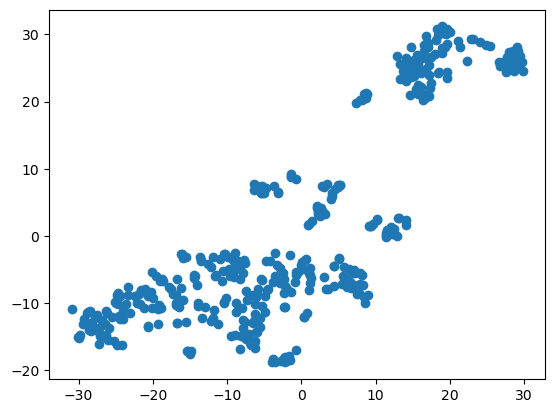

In [47]:
# Постройте диаграмму рассеяния на этих данных

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

# Задание 2


In [64]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state=42, )

labels_train = kmeans.fit_predict(X_train_scaled)
X_train_scaled.shape, labels_train.shape




((404, 13), (404,))

In [93]:
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [65]:
# Посмотрим, сколько элементов в каждом кластере
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

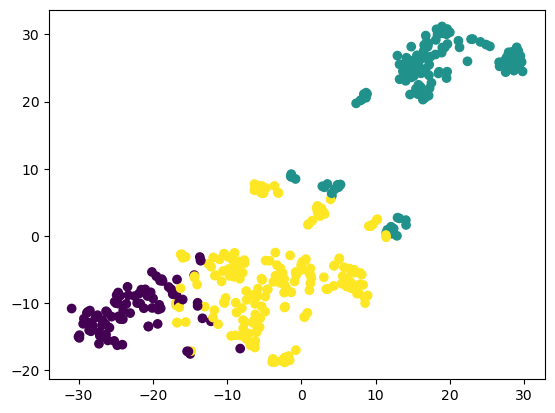

In [66]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

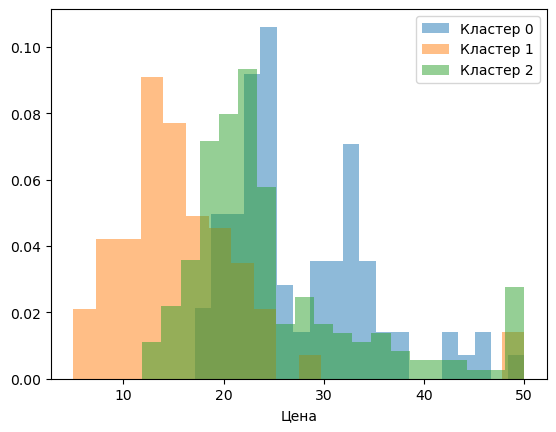

In [97]:
# Распределение цены недвижимости по кластерам
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [68]:
# Вычислите средние значения price в разных кластерах
y_train.mean()

price    22.796535
dtype: float64

In [95]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [78]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [79]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [81]:
# Вычислите средние значения CRIM в разных кластерах
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [82]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [83]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

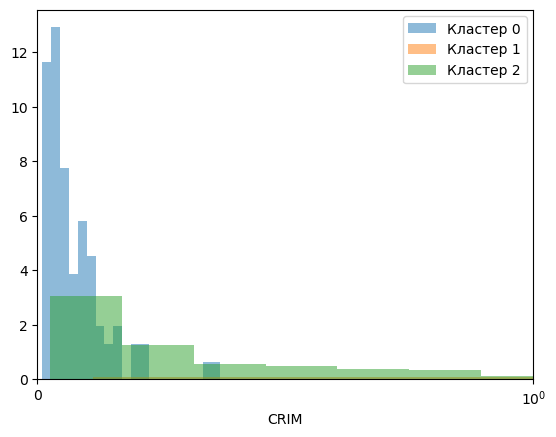

In [101]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.xscale('symlog')
plt.xlim(0, 1)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

# *Задание 3


In [102]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора

labels_test = kmeans.predict(X_test_scaled)

In [104]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: price    31.35
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    21.860784
dtype: float64
Средние значения CRIM:
Кластер 0: 0.062060000000000004
Кластер 1: 10.165531142857143
Кластер 2: 0.26607882352941176
